<a href="https://colab.research.google.com/github/Kamraaan1/BDA/blob/main/Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'>  Business Data Analytics  </font></center></h1>
<h2><center> <font color='black'> Customer lifecycle management: Churn Prediction - Classification</font></center></h3>
<h2><center> <font color='black'> University of Tartu</font></center></h3>
</div>

In the last lab sessions we have discovered and predicted the **lifetime value (CLV)** programmatically. Since we know our best customers by segmentation and lifetime value prediction, we should also work hard on retaining them. That’s what makes **Retention Rate** is one of the most critical metrics.
    
**Retention Rate** is an indication of how good is your product market fit (PMF). If your PMF is not satisfactory, you should see your customers churning very soon. One of the powerful tools to improve  Retention Rate (hence the PMF) is **Churn Prediction**. Churn is a one of the biggest problem in the telecom industry. 
    
By using **Churn Prediction**, you can easily find out who is likely to churn in the given period. In this session, we will use a **Telco dataset** and `go over the following steps to develop a Churn Prediction model:`
    
1. Exploratory data analysis
2. Feature engineering
3. Investigating how the features affect Retention by using Logistic Regression
4. Building a classification model with different methods (Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost).



![mltasks](https://i.ibb.co/J748hgj/mltasks.png)

# Churn:
Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%. 

![step1](https://i.ibb.co/JmyLmCc/step1.png)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
%matplotlib inline


#Let's make this notebook reproducible, you can use any number ex = 42
np.random.seed(42)


# set plot style for all plots
plt.style.use('ggplot')


# https://www.webucator.com/blog/2015/03/python-color-constants-module/

## Data Exploration

1. Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis.

![step2](https://i.ibb.co/0fVTjwm/step2.png)


**Let us read the data file in the python notebook**

In [ ]:
telecom_cust = pd.read_csv('Telco_Customer_Churn.csv')

telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# list our coulmns
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
telecom_cust.shape

(7043, 21)

In [ ]:
# Checking the data types of all the columns
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Let's explore the data to see if there are any missing values.**

In [ ]:
# Converting Total Charges to a numerical data type.
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

After looking at the above output, we can say that there are 11 missing values for Total Charges. Let us replace remove these 11 rows from our data set

In [ ]:
#Removing missing values 
telecom_cust.dropna(inplace = True)

#Remove customer IDs from the data set
df2 = telecom_cust.iloc[:,1:]

# https://www.datacamp.com/community/tutorials/data-preparation-with-pandas
# Data types
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


* Let's plot the `correlation` between our target column and all other features

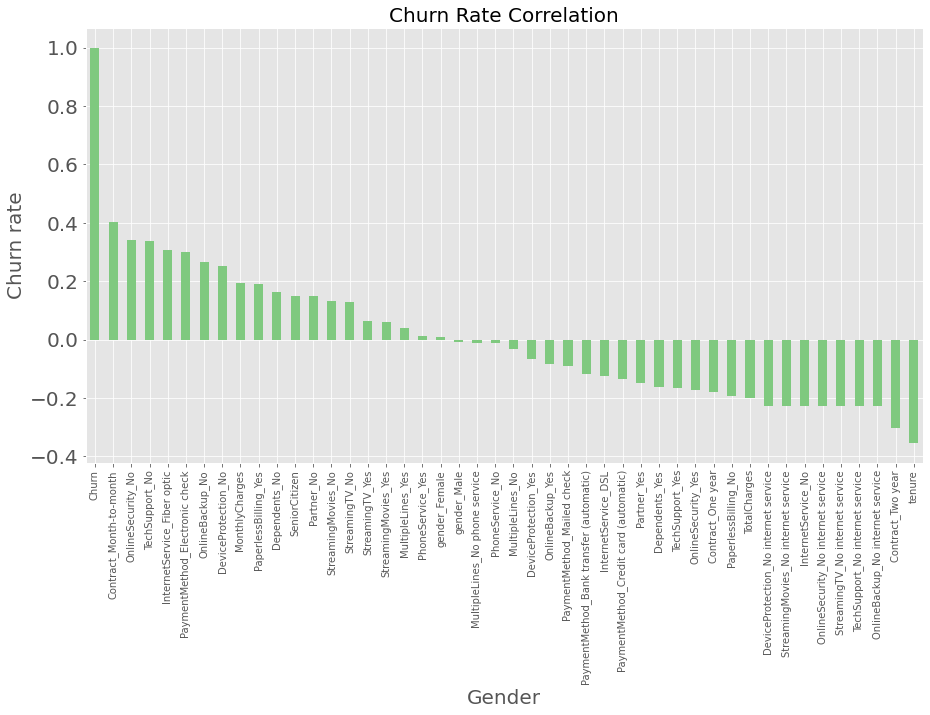

In [ ]:
import matplotlib.cm as cm
from sklearn.preprocessing import normalize

#Get Correlation of "Churn" with other variables:


plt.figure(figsize=(15,8))
plt.style.use('ggplot')

# https://stackoverflow.com/questions/47302343/what-names-can-be-used-in-plt-cm-get-cmap
# Get a color map
my_cmap = cm.get_cmap('Accent')

df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', cmap=my_cmap)

# set titles for figure, x, y
plt.title('Churn Rate Correlation',fontsize=20)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Churn rate',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

1. Month to month contracts, absence of online security and tech support seem to be **positively correlated** with churn. While, tenure, two year contracts seem to be negatively correlated with churn. 

2. Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be **negatively related to churn**.

3. We will explore the patterns for the above correlations below before we dive into modelling and identifying the important variables.

**A.)** ***Demographics*** - Let us first understand the gender, age range, partner and dependent status of the customers

1. **Gender Distribution** - About half of the customers in our data set are male while the other half are female

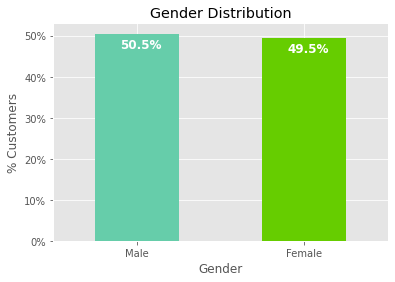

In [ ]:
colors = ['#66CDAA','#66CD00']
ax = (telecom_cust['gender'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

2. **% Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.


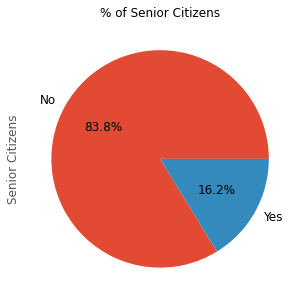

In [ ]:
ax = (telecom_cust['SeniorCitizen'].value_counts()*100.0 /len(telecom_cust))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12)                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12);

3. **Partner and dependent status**  - About 50% of the customers have a partner, while only 30% of the total customers have dependents. 

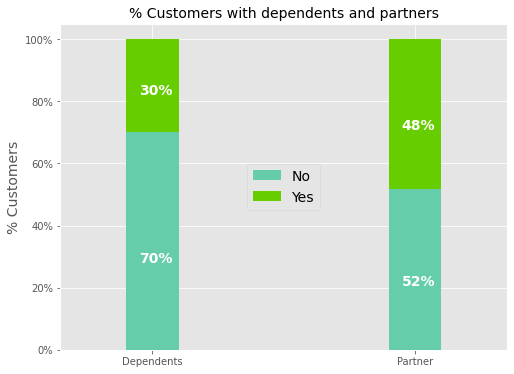

In [ ]:
colors = [ '#66CDAA','#66CD00']

# melt(): Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html 
df2 = pd.melt(telecom_cust, id_vars=['customerID'], value_vars=['Dependents','Partner'])

# Unstack(): Returns a DataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_cust)

ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**What would be interesting is to look at the % of customers, who have partners, also have dependents. We will explore this next.**

Interestingly,  among the customers who have a partner, only about half of them also have a dependent, while other half do not have any independents. 
Additionally, as expected, among the customers who do not have any partner, a majority (80%) of them do not have any dependents .

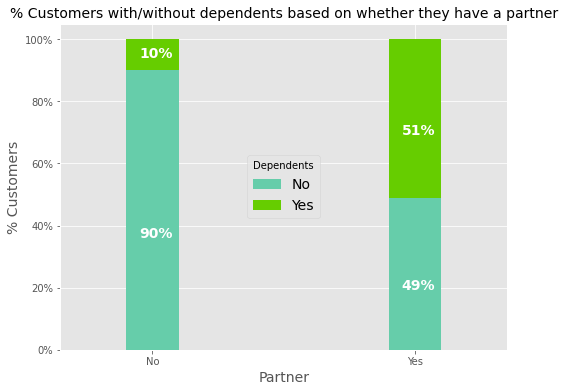

In [ ]:
colors = [ '#66CDAA','#66CD00']
partner_dependents = telecom_cust.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

### B.) **Customer Account Information**:  Let us now look at the tenure, contract

**1. Tenure:**  After looking at the below histogram we can see that a lot of customers have been with the telecom company for just a month, while quite a many are there for about 72 months. This could be potentially because different customers have different contracts.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


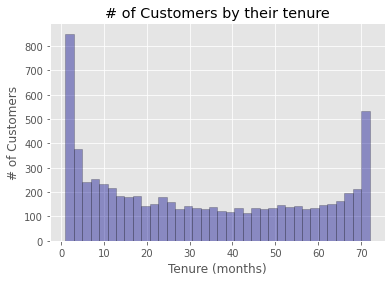

In [ ]:
ax = sns.distplot(telecom_cust['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure');

**2. Contracts:** To understand the above graph, lets first look at the # of customers by different contracts. 

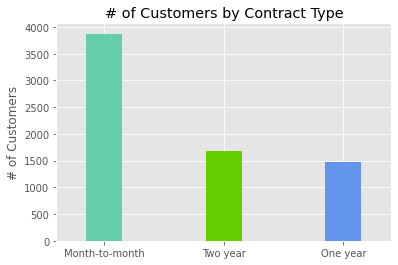

In [ ]:
colors = [ '#66CDAA','#66CD00',  '#6495ED']
ax = telecom_cust['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3, color=colors)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type');

As we can see from this graph most of the customers are in the month to month contract. While there are almost equal number of customers in the 1 year and 2 year contracts.

Below we will understand the tenure of customers based on their contract type.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


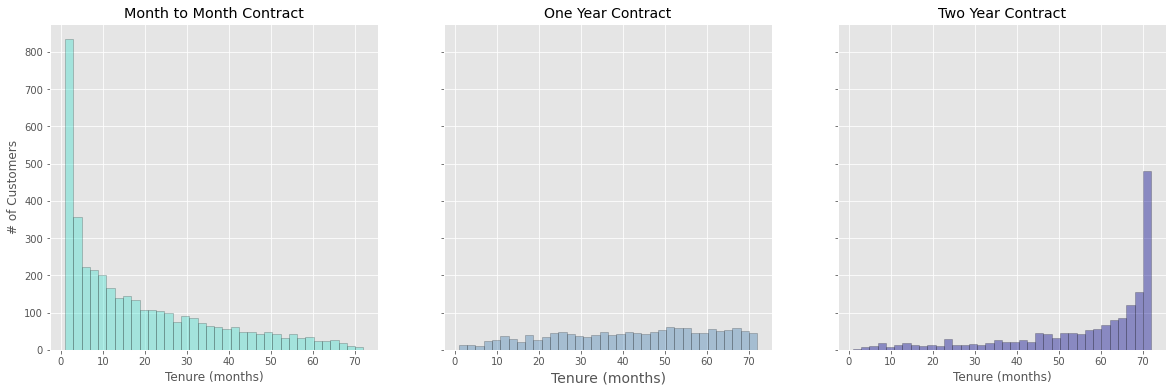

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_cust[telecom_cust['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract');

Most of the customers with monthly contracts stay with telecom for 1-2 months, while customers with 2-year contracts tend to stay for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. 

This is also what we saw in the earlier chart on correlation with the churn rate. 

###  C. Let us now look at the distribution of various services used by customers

In [ ]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

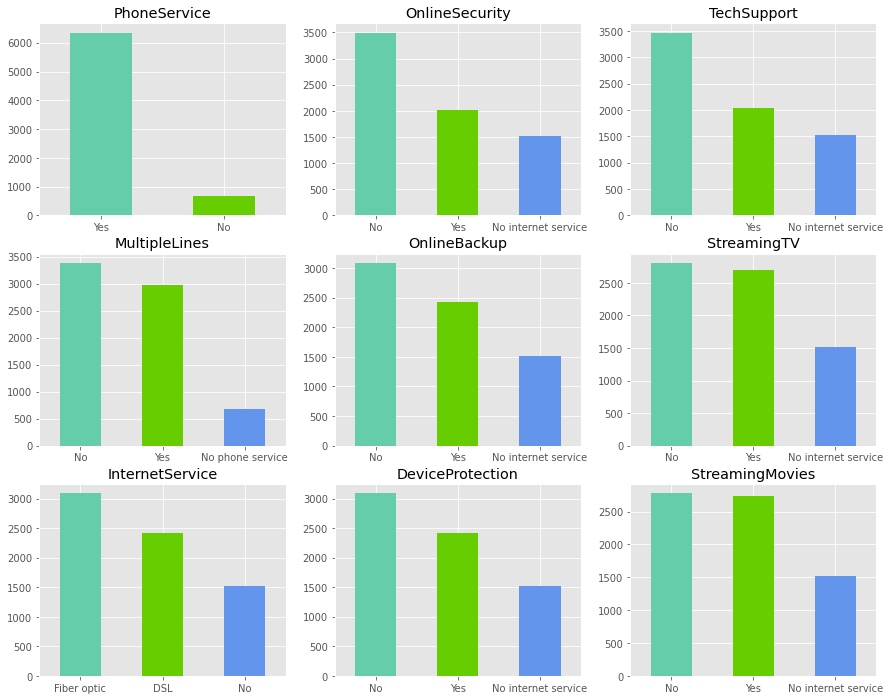

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

colors = [ '#66CDAA','#66CD00',  '#6495ED']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color = colors)
        
    elif i >=3 and i < 6:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color = colors)
        
    elif i < 9:
        ax = telecom_cust[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color = colors)
    ax.set_title(item)

### D.) Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot. 

1. Lets first look at the churn rate in our data

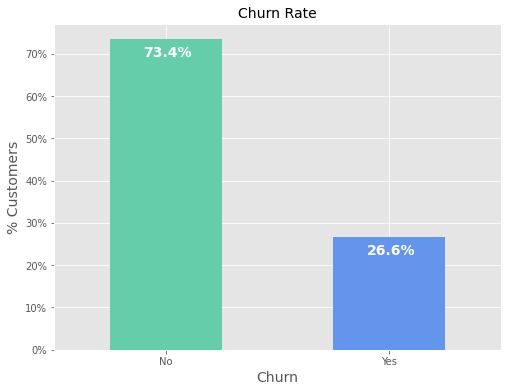

In [ ]:
colors = [ '#66CDAA',  '#6495ED']
ax = (telecom_cust['Churn'].value_counts()*100.0 /len(telecom_cust)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:  
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In our data, 74% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

2. Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.

**i.) Churn vs Tenure**: As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company. 

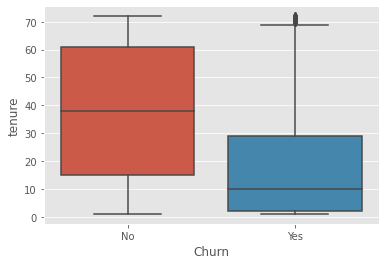

In [ ]:
sns.boxplot(x = telecom_cust.Churn, y = telecom_cust.tenure);

**ii.) Churn by Contract Type**: Similar to what we saw in the correlation plot, the customers who have a month to month contract have a very high churn rate.

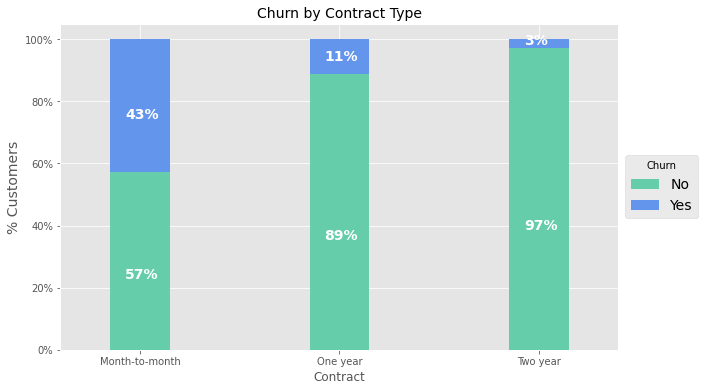

In [ ]:
colors = [ '#66CDAA', '#6495ED']
contract_churn = telecom_cust.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

**iii.) Churn by Seniority**: Senior Citizens have almost double the churn rate than younger population.

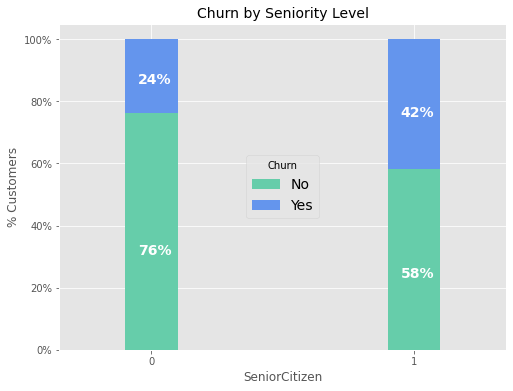

In [ ]:
colors = [ '#66CDAA', '#6495ED']
seniority_churn = telecom_cust.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (seniority_churn.T*100.0 / seniority_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

**iv.) Churn by Monthly Charges**: Higher % of customers churn when the monthly charges are high.

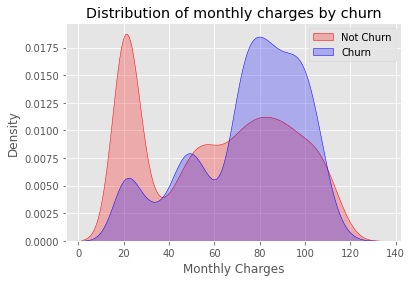

In [ ]:
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True,)
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn');

**v.) Churn by Total Charges**: It seems that there is higer churn when the total charges are lower.

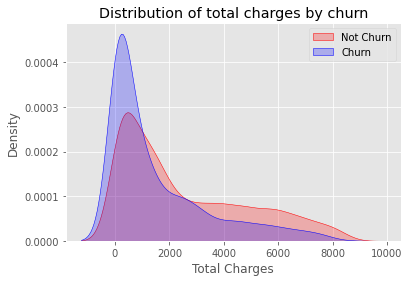

In [ ]:
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn');

## After going through the above Data Exploration, and understanding now we can develop some predictive models and compare them.


* To build a classification model we will try 5 different algorithms: 
    1. Logistic Regression
    2. Random Forest
    3. SVM
    4. ADA Boost
    5. XGBoost


**1. Logistic Regression**

* In the Machine Learning world, Logistic Regression is a kind of parametric classification model, despite having the word ‘regression’ in its name. 
* In Logistic Regression, we don’t directly fit a straight line to our data like in linear regression. Instead, we fit a S shaped curve, called Sigmoid, to our observations.

![picture](https://miro.medium.com/max/700/1*44qV8LhNzE5hPnta2PaaHw.png)

Logistic Regression explained: https://towardsdatascience.com/logistic-regression-explained-9ee73cede081

In [ ]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler


features = X.columns.values

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X)

X = pd.DataFrame(scaler.transform(X))

X.columns = features

![steps34](https://i.ibb.co/VgSy5Gq/steps3-4.png)

In [ ]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

* Confusion matrix

![picture](https://miro.medium.com/max/356/1*Z54JgbS4DUwWSknhDCvNTQ.png)

More info here: 
1. https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

2. https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

![steps56](https://i.ibb.co/GPFmGc6/steps5-6.png)

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
#print (metrics.accuracy_score(y_test, prediction_test))
accuracy = model.score(X_test, y_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy))

y_pred = model.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix")
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.81

 Confusion Matrix
[[1418  162]
 [ 244  286]]


Let's plot confusion matrix!

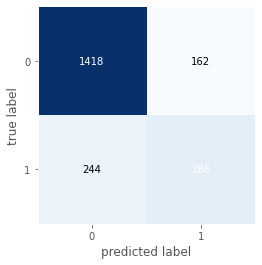

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

binary = confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=binary)
plt.show()

Let's create a separate dataframe to store our models' performance results:

In [ ]:
results_df = pd.DataFrame(columns=['model', 'accuracy', ])


results_df = results_df.append({'model': 'Logistic Regression', 'accuracy': accuracy,}, ignore_index=True)
results_df

,model,accuracy
0,Logistic Regression,0.807583


**Observations**

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:
* As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
* Having DSL internet service also reduces the proability of Churn
* Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are  likely to churn because of it. I think we need to explore more to better understad why this is happening. 

Any hypothesis on the above would be really helpful! 

**2. Random Forest**

To understand how Random forest works, we firstly need to get familiar with **Decision Trees**.

* **Decision Trees**

Decision trees are the most important elements of a Random Forest. They are capable of fitting complex data sets while allowing the user to see how a decision was taken. The results of a work of Decision Tree can be easily visualized.

![picture](https://miro.medium.com/max/484/1*gql3YU01S-BUiCt8mgE66w.png)

More about Decision Trees: https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d

[**Random forest**](https://towardsdatascience.com/understanding-random-forest-58381e0602d2), 
like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.

![picture](https://miro.medium.com/max/500/1*VHDtVaDPNepRglIAv72BFg.jpeg)

    

![rf](https://miro.medium.com/max/500/1*EemYMyOADnT0lJWSXmTDdg.jpeg)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_test)
print('Accuracy of Random Forest classifier on test set: ', accuracy)

results_df = results_df.append({'model': 'RandomForestClassifier', 'accuracy': accuracy,}, ignore_index=True)
# results_df

Accuracy of Random Forest classifier on test set:  0.8088130774697939



**3. Support Vecor Machine (SVM)**

A support vector machine takes the data points and outputs the hyperplane (which in two dimensions it’s simply a line) that best separates the tags. This line is the **decision boundary**


Read more: https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm

In [ ]:
# First, split the data intro train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [ ]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
accuracy = metrics.accuracy_score(y_test, preds)
print('Accuracy of Support Vecor Machine (SVM) on test set: ', accuracy)
print("\nConfusion Matrix")
print(metrics.confusion_matrix(y_test,preds)) 

Accuracy of Support Vecor Machine (SVM) on test set:  0.820184790334044

Confusion Matrix
[[953  89]
 [164 201]]


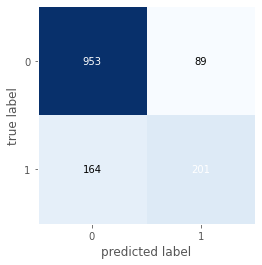

In [ ]:
binary = metrics.confusion_matrix(y_test,preds)

fig, ax = plot_confusion_matrix(conf_mat=binary)
plt.show()

In [ ]:

results_df = results_df.append({'model': 'SVM', 'accuracy': accuracy,}, ignore_index=True)
# results_df

**4. ADA Boost (Adaptive Boosting)**

    Adaboost helps you combine multiple “weak classifiers” into a single “strong classifier”. 

AdaBoost is an ensemble method that trains and deploys trees in series. AdaBoost implements boosting, wherein a set of weak classifiers is connected in series such that each weak classifier tries to improve the classification of samples that were misclassified by the previous weak classifier. In doing so, boosting combines weak classifiers in series to create a strong classifier.

Read more: https://www.sciencedirect.com/topics/engineering/adaboost

In [ ]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, preds)
print('Accuracy of AdaBoostClassifier on test set: ', accuracy)

Accuracy of AdaBoostClassifier on test set:  0.8159203980099502


In [ ]:

results_df = results_df.append({'model': 'AdaBoost', 'accuracy': accuracy, }, ignore_index=True)
# results_df

**5. XG Boost (eXtreme Gradient Boosting)**

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. It uses a Gradient Boosting algorithm - a special case of boosting where errors are minimized by gradient descent algorithm e.g. the strategy consulting firms leverage by using case interviews to weed out less qualified candidates.

A nice article about XGBoost and other boosting algorithms: https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

============================ 

[Link to CatBoost algorithm](https://catboost.ai/)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

#create feature set and labels
#X = df_data.drop(['Churn','customerID'],axis=1)
#y = df_data.Churn#train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)#building the model & printing the score

xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

prediction_test = xgb_model.predict(X_test)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))

print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.84
Accuracy of XGB classifier on test set: 0.84


In [ ]:

results_df = results_df.append({'model': 'XGBoost', 'accuracy': xgb_model.score(X_test[X_train.columns], y_test), }, ignore_index=True)
# results_df

Finally, the best way to use this model is assigning Churn Probability for each customer, create segments, and build strategies on top of that. To get the churn probability from our model, utilize the code block below:


In [ ]:
telecom_cust['proba'] = xgb_model.predict_proba(df_dummies[X_train.columns]) [:,1]
telecom_cust[['customerID','proba']].head()

,customerID,proba
0,7590-VHVEG,0.187380
1,5575-GNVDE,0.067550
2,3668-QPYBK,0.095526
3,7795-CFOCW,0.106214
4,9237-HQITU,0.152732


Interestingly with XG Boost I was able to increase the accuracy on test data to almost 83%. Clearly, XG Boost is a winner among all other techniques. XG Boost is a slow learning model and is based on the concept of Boosting

###Evolution of boosting algorithms

![picture](https://miro.medium.com/max/700/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg)

Let's now take a look at our results_df

In [ ]:
results_df

,model,accuracy
0,Logistic Regression,0.807583
1,RandomForestClassifier,0.808813
2,SVM,0.820185
3,AdaBoost,0.815920
4,XGBoost,0.838068


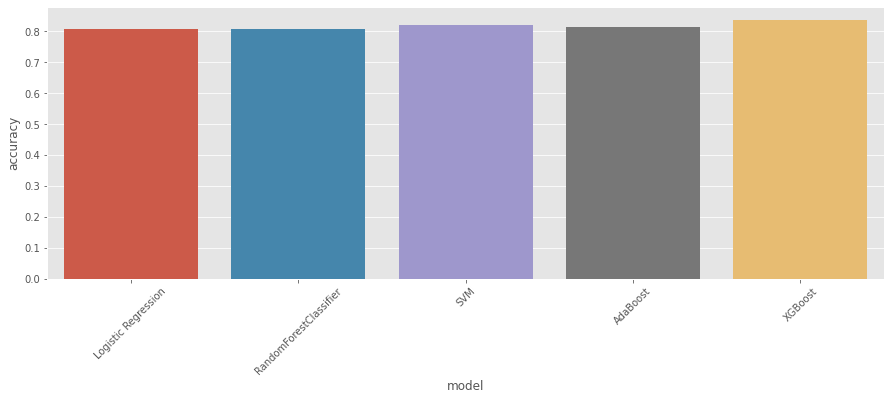

In [ ]:
fig, ax1, = plt.subplots(1, 1, figsize=(15,5))
sns.barplot(x="model", y="accuracy", data=results_df, ax=ax1)
# rotate the xticks (for each plot)
plt.setp(ax1.get_xticklabels(), rotation=45);
